In [1124]:
%matplotlib inline
from numpy import *
import numpy as np
import math
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import matplotlib.cm as cm 
import astroalign as aa

from astropy.io import fits
from astropy.nddata import CCDData
from astropy.stats import mad_std, SigmaClip, sigma_clipped_stats
from photutils.detection import DAOStarFinder
from platform import python_version
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import *
from astropy.visualization import SqrtStretch
from photutils import *
from astropy.modeling.models import Moffat1D
from scipy.signal import peak_widths
from scipy.ndimage import gaussian_filter
from astropy.visualization import simple_norm, ImageNormalize, ZScaleInterval
from astroML.time_series import lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

import pandas as pd
from astropy.table import Table
from astropy import units as u
import sys
sys.path.insert(0, '/Users/josue/kosmos/')
import warnings
warnings.filterwarnings('ignore')

In [152]:
import kosmos
DISPLAY = True

In [153]:
kosmos.__version__

'0.1'

In [359]:
# Creats a directory array
def dir_array(D, j):
    i = pd.read_table(D + j, names=['impath'])
    k = D + i['impath'].values
    #print(k)
    return k

# SS Cyg in the i filter
def reduce(dir_array, bias, flat):
    sciimg_array = []
    for i in dir_array:
        sci = i
        sciimg = kosmos.proc(sci, bias=bias, ilum=None, flat=flat, trim=None)
        sciimg_array.append(sciimg)
    return sciimg_array

# gets header 
def get_header(dir_arrray, HEADER):
    j = []
    for i in dir_arrray:
        hdu_list = fits.open(i)
        a = hdu_list[0].header[HEADER]
        j.append(a)
    return j

# Magnitude function 
def makemag(flux,exptime,C):
    m = C - 2.5 * np.log(np.abs(flux / exptime))
    return m

## 1) Data reduction

In [443]:
# First night
dir = 'C:/Users/josue/Work-space/Project 2/Data/07.28.2022/'

# Master bias
biasfiles_1 = pd.read_table(dir + 'bias_28.txt', names=['impath'])
biasfiles1 = dir + biasfiles_1['impath'].values
bias = kosmos.biascombine(biasfiles1) 

# Master flats
i_flats = dir_array(dir, "flats_i.txt")
flat_i, ilum_i = kosmos.flatcombine(i_flats, bias=bias, trim=None)

# Reduced object SS Cyg
ss_cyg1 = dir_array(dir, "ss_cyg.txt")
# scimgs of SS Cyg and their JD for day 28
SS_Cyg1 = reduce(ss_cyg1, bias, flat_i)
SS_JD1 = get_header(ss_cyg1, "JD")
SS_EXP1 = get_header(ss_cyg1, "exptime")

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

In [444]:
# Second night
dir_2 = 'C:/Users/josue/Work-space/Project 2/Data/07.29.2022/'

# Master bias 
biasfiles_2 = pd.read_table(dir_2 + 'bias_29.txt', names=['impath'])
biasfiles2 = dir_2 + biasfiles_2['impath'].values
bias_2 = kosmos.biascombine(biasfiles2)

# Master flat
i_flats2 = dir_array(dir_2, "flats_i.txt")
flat_i2, ilum_i2 = kosmos.flatcombine(i_flats2, bias=bias_2, trim=None)

# Reduced object SS Cyg
ss_cyg2 = dir_array(dir_2, "ss_cyg.txt")
# scimgs of SS Cyg and their JD for day 28
SS_Cyg2 = reduce(ss_cyg2, bias_2, flat_i2)
SS_JD2 = get_header(ss_cyg2, "JD")
SS_EXP2 = get_header(ss_cyg2, "exptime")

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

In [445]:
# Third night
dir_3 = 'C:/Users/josue/Work-space/Project 2/Data/07.30.2022/'

biasfiles_3 = pd.read_table(dir_2 + 'bias_29.txt', names=['impath'])
biasfiles3 = dir_2 + biasfiles_3['impath'].values
bias_3 = kosmos.biascombine(biasfiles3)

# Master flat
i_flats3 = dir_array(dir_3, "flats_i.txt")
flat_i3, ilum_i3 = kosmos.flatcombine(i_flats3, bias=bias_3, trim=None)

# Reduced object SS Cyg
ss_cyg3 = dir_array(dir_3, "ss_cyg.txt")
# scimgs of SS Cyg and their JD for day 28
SS_Cyg3 = reduce(ss_cyg3, bias_3, flat_i3)
SS_JD3 = get_header(ss_cyg3, "JD")
SS_EXP3 = get_header(ss_cyg3, "exptime")

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

In [446]:
# Fourth night
dir_4 = 'C:/Users/josue/Work-space/Project 2/Data/07.31.2022/'

biasfiles_4 = pd.read_table(dir_4 + 'bias_31.txt', names=['impath'])
biasfiles4 = dir_4 + biasfiles_4['impath'].values
bias_4 = kosmos.biascombine(biasfiles4)

# Master flat
i_flats4 = dir_array(dir_4, "flats_i.txt")
flat_i4, ilum_i4 = kosmos.flatcombine(i_flats4, bias=bias_4, trim=None)

# Reduced object SS Cyg
ss_cyg4 = dir_array(dir_4, "ss_cyg.txt")
# scimgs of SS Cyg and their JD for day 28
SS_Cyg4 = reduce(ss_cyg4, bias_4, flat_i4)
SS_JD4 = get_header(ss_cyg4, "JD")
SS_EXP4 = get_header(ss_cyg4, "exptime")

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

In [1179]:
# arrays of JD and reduced SS Cyg
SS_Cyg = SS_Cyg1 + SS_Cyg2 + SS_Cyg3 + SS_Cyg4
SS_JD = SS_JD1 + SS_JD2 + SS_JD3 + SS_JD4
SS_ExpT = SS_EXP1 + SS_EXP2 + SS_EXP3 + SS_EXP4 # dont need this they all 5 sec


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
(512, 512)
adu / s


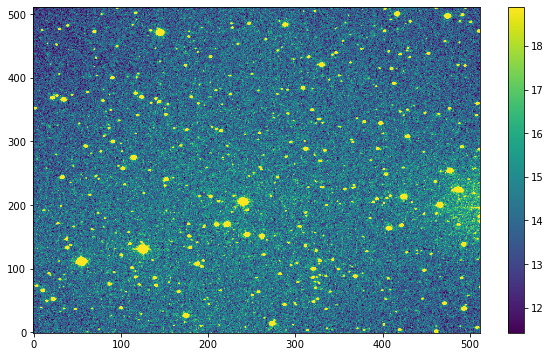

In [1186]:
sciimg = kosmos.proc(ss_cyg4[0], bias=bias_4, ilum=ilum_i4, flat=flat_i4, trim=None)

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(10,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()

In [1135]:
float_JD = []
for i in SS_JD:
    k = float(i)
    float_JD.append(k)

## 2) Finding Calibrated Magnitudes

In [1171]:
m = 0
mean, median, std = sigma_clipped_stats(SS_Cyg[m], sigma=3.0)
step = SS_Cyg[m].data
sciimg_data = np.ma.getdata(step)

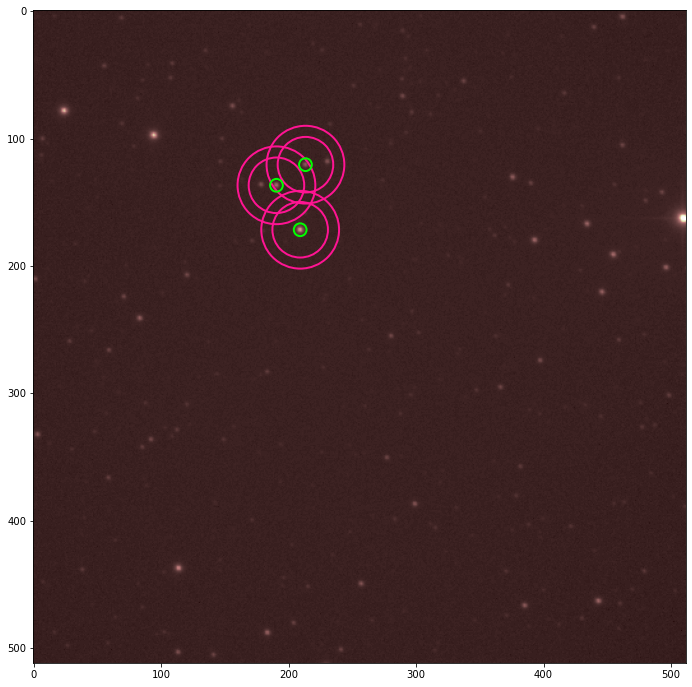

In [1187]:
dao = DAOStarFinder(fwhm=2.18, threshold=300)
sources = dao(sciimg_data - median)
mask = sources['xcentroid'] < 300
sources = sources[mask]
mask2 = sources['xcentroid'] > 100
sources = sources[mask2]
mask3 = sources['ycentroid'] < 250
sources = sources[mask3]

positions = []

for i, j in zip(sources['xcentroid'], sources['ycentroid']):
    positions.append((i,j));

apertures = CircularAperture(positions, r=5)
norm = ImageNormalize(stretch=SqrtStretch())
# wanted star is at xcent (208.95246610163315, 171.59263980420403)
annulus = CircularAnnulus(positions,r_in = 21.8,r_out = 30.52)
plt.figure(figsize=(12,12))
annulus.plot(color='deeppink', linewidth=2)
apertures.plot(color='lime',linewidth=2, label = 'Best')
plt.imshow(sciimg_data, norm=norm, cmap='pink');
# plt.xlim(150, 260)
# plt.xticks(np.arange(150, 260, 5))
# plt.ylim(100, 200)
# plt.yticks(np.arange(100, 200, 5))
total_sky = aperture_photometry(sciimg_data,annulus)['aperture_sum']
avg_sky = total_sky / annulus.area
sky = avg_sky * apertures.area
fluxes = sources['flux'].data - sky.data

In [1188]:
sources

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
3,213.0897839315616,120.52938867455791,0.6739409277877246,0.16806916536095268,0.09957532845466958,25,0.0,423.22433435244847,1.1859894259750348,-0.18520204242481364
5,190.31886034652615,136.7077206067551,0.6799375922687875,-0.03609000361017715,0.0020268744672155103,25,0.0,842.2472101718137,2.3990134731281243,-0.9500817175527232
8,208.95246610163315,171.59263980420403,0.659776489162109,0.25651266870191025,0.0943331235597478,25,0.0,3201.051108471992,9.342119969948817,-2.4261136003124593


In [1189]:
my_flux = fluxes #get_phot(SS_Cyg_data)
mags = []
j = 0
# makemag(flux, 5, 10)
for i in my_flux:
    make_mag = makemag(my_flux[j], 5, 10)
    mags.append(make_mag)
    j += 1

In [1191]:
diff_mag = mags - mags[0]
delta_1 = diff_mag[0] - 13.027
delta_2 = diff_mag[2] - 11.331
avg_delta = 1/2 * (delta_1 + delta_2)
calib_mag = diff_mag[2] - avg_delta
calib_mag

12.386143545013395

In [1097]:
calib_mags = [12.386143545013395,
             12.31685654912796, 
             12.403140898560398,
             12.419588690768544,
             12.377126915576063,
             12.363706715800248,
             12.38379122469958,
             12.52451225649595,
             12.48204055834887,
             12.373337201291676,
             12.478134262879829,
             12.335124707508383,
             12.377148395636409,
             12.377531493268492,
             12.387526110751871,
             12.370763620853374,
             12.551961322418617,
             12.554237230852017,
             12.53578865136391,
             12.43185790810925,
             12.502071639903605,
             12.52889681742079,
             12.477685999026406,
             12.423484066578286,
             12.284267317938337,
             12.378762440440541,
             12.467458677089382,
             12.444344836462486,
             12.350854897622677,
             12.39579483447298,
             12.48003007468507,
             12.487457504224105,
             12.460547661467775,
             12.320797330657019,
             12.319918574608089,
             12.228711271203476,
             12.289248682928395]
 


In [824]:
SS_Cyg_data = []
for i in SS_Cyg:
    k = i.data
    SS_Cyg_data.append(k)

In [1098]:
def get_phot(Array):
    dao = DAOStarFinder(fwhm=2.18, threshold=100)
    all_flux = []
    for k in Array:
        sources = dao(k - median)
        
        mask = sources['xcentroid'] < 300
        sources = sources[mask]
        mask2 = sources['xcentroid'] > 100
        sources = sources[mask2]
        mask3 = sources['ycentroid'] < 250
        sources = sources[mask3]
        
        positions = []
        for i, j in zip(sources['xcentroid'], sources['ycentroid']):
            # if j > 100 and j < 200 and i < 300:
            positions.append((i,j));
        apertures = CircularAperture(positions, r=5)
        norm = ImageNormalize(stretch=SqrtStretch())
        # wanted star is at xcent 206.4943
        annulus = CircularAnnulus(positions,r_in = 21.8,r_out = 30.52)
        # print(np.max(k))
        # plt.figure(figsize=(12,12))
        # annulus.plot(color='deeppink', linewidth=2)
        # apertures.plot(color='lime',linewidth=2, label = 'Best')
        # plt.imshow(k, norm=norm, cmap='pink');
        total_sky = aperture_photometry(k, annulus)['aperture_sum']
        avg_sky = total_sky / annulus.area
        sky = avg_sky * apertures.area
        fluxes = sources['flux'].data - sky.data
        all_flux.append(fluxes)
    return all_flux

In [1099]:
my_flux = get_phot(SS_Cyg_data)
mags = []
j = 0
# makemag(flux, 5, 10)
for i in my_flux:
    make_mag = makemag(my_flux[j], 5, 10)
    mags.append(make_mag)
    j += 1

In [1102]:
# calib_mags

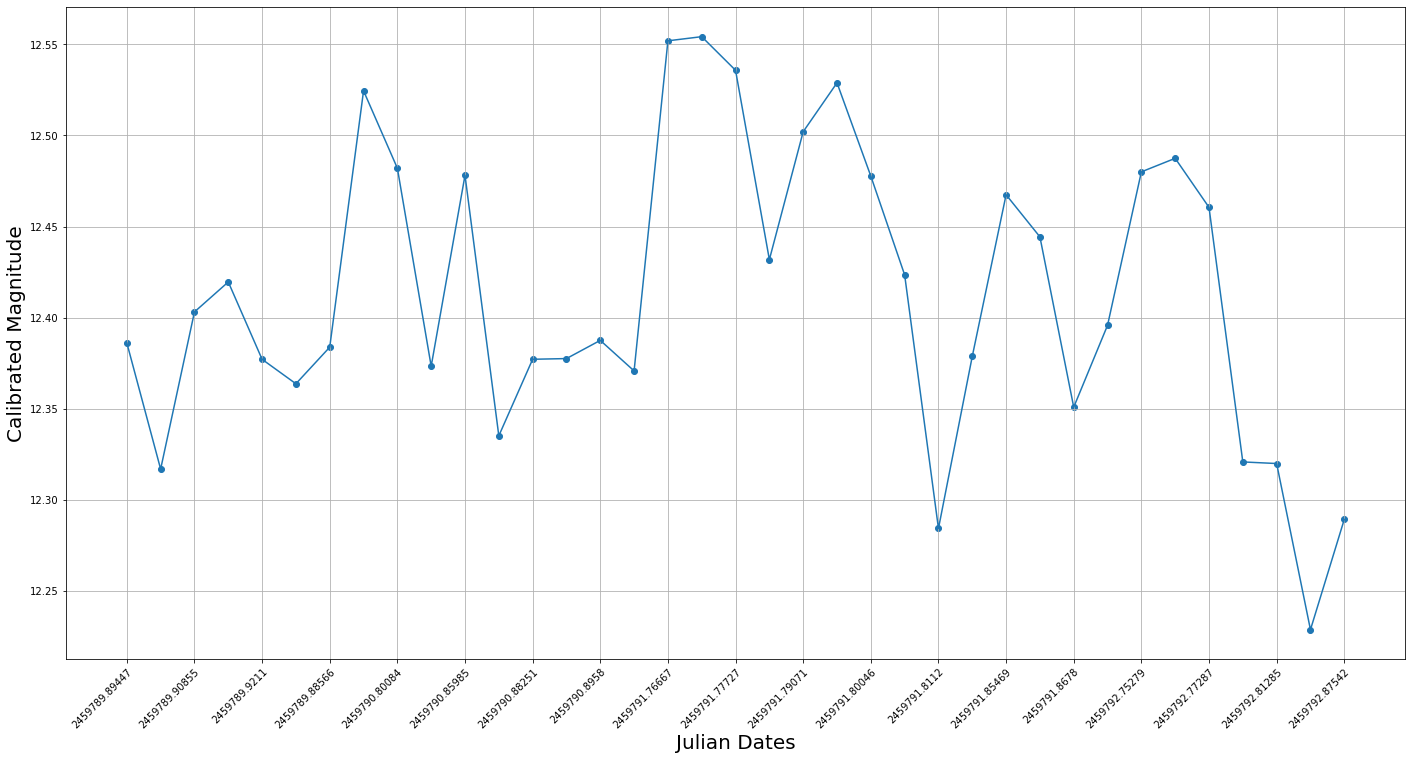

In [1120]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(24,12)

ax.plot(SS_JD, calib_mags)
ax.scatter(SS_JD, calib_mags)
ax.set_xlabel('Julian Dates')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Calibrated Magnitude')
ax.yaxis.label.set_fontsize(20)

ax.title.set_fontsize(20)
ax.grid()
ax.set_xticks(ax.get_xticks()[::2])
ax.set_xticklabels(SS_JD[::2], rotation=45, ha='right', rotation_mode='anchor');

In [1169]:
def plot_phased(t, y_obs, P, ax = None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(14,7))

    phase = t / P - np.floor(t/P)
    ax.errorbar(phase, y_obs, sigma_y, fmt='.k', lw=1, ecolor='gray')
    ax.set_xlabel('phase')
    ax.set_ylabel('Calibrated Magnitude')
    ax.set_xlim(-0.05, 1.05)
    
def plot_LS(t, y_obs, P_fit, sig1, sig5):
    #------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(14, 7))
    fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

    # First panel: the data
    ax = fig.add_subplot(211)
    plot_phased(t, y_obs, P_fit, ax=ax)
    ax.set_ylim(12.2, 12.6)
    ax.invert_yaxis()

    # Second panel: the periodogram & significance levels
    ax1 = fig.add_subplot(212, xscale='linear')
    ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
    ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black', label="99% significance level")
    ax1.plot([period[0], period[-1]], [sig5, sig5], '-.', c='black', label="95% significance level")
    ax1.legend()

    ax1.annotate("", (P_fit, 0.95), (P_fit, 1.10), ha='center', arrowprops=dict(arrowstyle='->'))

    ax1.set_xlim(period[0], period[-1])
    ax1.set_ylim(-0.05, 1.15)

    ax1.set_xlabel(r'period (days)')
    ax1.set_ylabel('power')

    # Twin axis: label BIC on the right side
    ax2 = ax1.twinx()
    ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, sigma_y)))
    ax2.set_ylabel(r'$\Delta BIC$')

    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
    ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
    ax1.xaxis.set_major_locator(plt.LogLocator(10))
    ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

    plt.show()

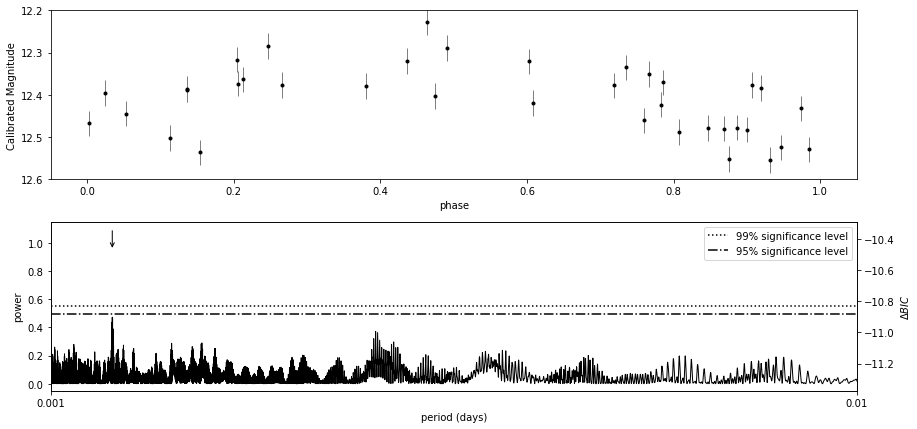

Location of highest periodogram peak, P_fit = 145.894 seconds


In [1177]:
# this is were we calculate the period
period = 10 ** np.linspace(-3, -2, 10000)
omega = 2 * np.pi / period
sigma_y = 0.03
PS = lomb_scargle(float_JD, calib_mags, sigma_y, omega, generalized=True)

# find the highest peak
P_fit = period[PS.argmax()]

D = lomb_scargle_bootstrap(float_JD, calib_mags, sigma_y, omega, generalized=True,
                           N_bootstraps=500, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

plot_LS(float_JD, calib_mags, P_fit, sig1, sig5)
sec = P_fit*86400
print(f"Location of highest periodogram peak, P_fit = {sec:.3f} seconds")

In [ ]:
# pick another star that has a i magnitude
# subtract it from all the magnitueds this gives you diff mag
# subtract known magnitudes from diff mag to get delta mag
# add the delta mags * 1/2 to get avg delta
# subtract the delta mag by avg delta
# do it for all sciimg to get SS Cyg calib mag